<a href="https://colab.research.google.com/github/pandu24-net/tugas4/blob/main/tugas4python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
cd /content/drive/MyDrive/new

/content/drive/MyDrive/new


In [85]:
ls


3scene/  dataset/  forest_test.jpg  nnmodel_scene/


In [87]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [88]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [89]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [90]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [91]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [92]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [93]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 128, 128, 3)
(148, 128, 128, 3)


In [95]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 32)      

In [96]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [97]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [98]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [99]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 6s 424ms/step - loss: 1.6045 - accuracy: 0.2410 - val_loss: 1.5866 - val_accuracy: 0.3311
Epoch 2/30
14/14 [==============================] - 6s 421ms/step - loss: 1.4977 - accuracy: 0.4167 - val_loss: 1.4965 - val_accuracy: 0.2770
Epoch 3/30
14/14 [==============================] - 6s 419ms/step - loss: 1.3186 - accuracy: 0.4505 - val_loss: 1.3696 - val_accuracy: 0.4392
Epoch 4/30
14/14 [==============================] - 6s 423ms/step - loss: 1.1643 - accuracy: 0.5383 - val_loss: 1.2132 - val_accuracy: 0.5608
Epoch 5/30
14/14 [==============================] - 6s 422ms/step - loss: 1.0450 - accuracy: 0.5788 - val_loss: 1.2844 - val_accuracy: 0.4932
Epoch 6/30
14/14 [==============================] - 6s 421ms/step - loss: 0.9614 - accuracy: 0.6532 - val_loss: 1.0560 - val_accuracy: 0.5743
Epoch 7/30
14/14 [==============================] - 6s 423ms/step - loss: 0.8319 - accuracy: 0.6757 - val_loss: 1.0770 - val_accuracy: 0.5676
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


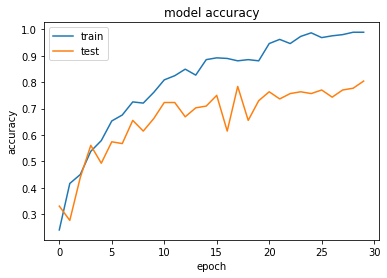

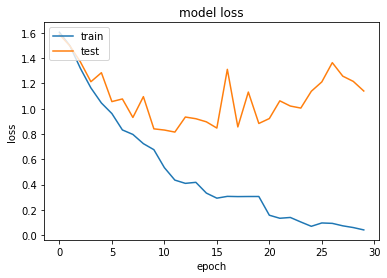

In [100]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.83      0.69      0.75        29
      GMB_03       0.88      0.88      0.88        24
      GMB_04       0.68      0.83      0.75        30
      GMB_05       0.88      0.79      0.84        29
      GMB_06       0.81      0.83      0.82        36

    accuracy                           0.80       148
   macro avg       0.82      0.80      0.81       148
weighted avg       0.81      0.80      0.80       148



In [103]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [104]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

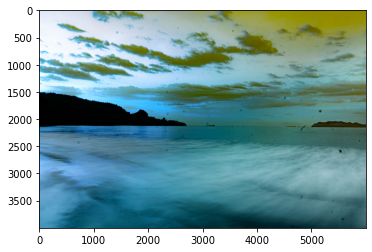

In [105]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [106]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [107]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [108]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9898230e-08 9.5850426e-01 1.0295080e-12 3.9009218e-09 4.1495595e-02]]
['GMB_03']
